<a href="https://colab.research.google.com/github/dukenel/Data_Analytics/blob/master/Capstone_Project_Data301_ML_Duke_Nelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/niteen11/data301_predictive_analytics_machine_learning/blob/main/data/amazon_alexa.tsv



Dataset: amazon-alexa-reviews 
Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
The objective is to discover insights into consumer reviews and perform sentiment analysis on the data.


# **Business Question**

***To predict feedback based on a customer's reviews, star rating, and variant on Alexa's products.***  

This is a **Classification Problem** which will require the use of ML Algorithms for prediction.

The following rubric will be followed to answer the business question:

*   Environment Set Up (Load required libraries)
*   Data Acquisition
*   Data Wrangling
*   EDA (Exploratory Data Analysis) - Plots, Graphs
*   Model Building
*   Model Evaluation
*   Summary and Conclusion

# **Environment Setup**

In [207]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot 
import pandas_profiling as pp

# **Data Acquisition**

Read in the tsv file from github account and load it into a dataframe called "data"

In [208]:
data = pd.read_csv('https://raw.githubusercontent.com/dukenel/data301_predictive_analytics_machine_learning/main/data/amazon_alexa.tsv', sep='\t')

# **Data Wrangling / Exploratory Data Analysis**

In [209]:
#Checking for any null entries in the dataset.
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [210]:
data.shape

(3150, 5)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [212]:
data['date'] = pd.to_datetime(data['date'])

In [213]:
data['Month']= data['date'].dt.month # from 1-12

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
 5   Month             3150 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.8+ KB


In [215]:
data.head()

,rating,date,variation,verified_reviews,feedback,Month
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,7
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,7
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,7
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,7
4,5,2018-07-31,Charcoal Fabric,Music,1,7


In [216]:
!pip install pandas-profiling==2.7.1

In [217]:
profile = pp.ProfileReport(data, title = "Alexa Review Exploration")

In [218]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b8aef1290>,
      dtype=object)

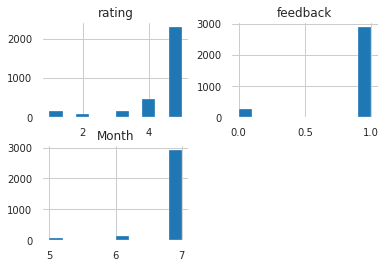

In [219]:
data.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Rating vs. Variation by feedback')

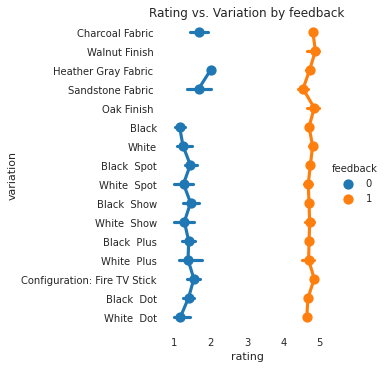

In [220]:
sns.factorplot(x="rating", y="variation", hue="feedback", data=data)
plt.title("Rating vs. Variation by feedback")

# **Inference from EDA**

Our data contains *3150 observations(rows)*  and *5 variables(columns)* and has *no null values*. We created a new variable to make inference on Months.

Dataset has 3 categorical values, 1 date value and 1 boolean value.

July saw the most reviews and feedback. brobably due to the time when data was extracted after product was released or due to increase in purchase by customers. Year of dataset was in 2018.

Rating 5 had the highest number followed by 4. It could indicate that customers were satisfied with their products.

We observe from the data set that there exists 16 different variations to the Alexa product. The first 5 variations in rankings are Blackdot, followed by Charcoal Fabric, Configuration:Fire TV Stick, Black Plus and Black Show.

There exists a strong correlation between ratings and feedback.

Our **Target Variable** (y) will be "*feedback*", and it is of type boolean. Our target variable is not balanced as more data favors a positive feedback. In this case, we will make inference from the f1-score.

Dataset may seem to have duplicates but further insight reveals uniqueness once an index is introduced. We might accept true duplicates iff there exists a unique customer id per observation. We will therefore ignore the duplicates and proceed with the 3150 observations.

For NLP model building, we will use the categorical values to gain an understanding into the reviews and feedback. For model building using Decision Trees/Random Forest, we will drop some of the Categorical data, perform category encoding and proceed with Machine Learning.

# **ML - Decision Tree**

*  Model Building
*  Model Evaluation
*  Summary and Conclusion

**ENCODING**

We will deploy category encoding for the Variation Attribute.

In [221]:
data2 = data.copy()

In [222]:
data.head()

,rating,date,variation,verified_reviews,feedback,Month
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,7
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,7
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,7
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,7
4,5,2018-07-31,Charcoal Fabric,Music,1,7


In [223]:
data2.head()

,rating,date,variation,verified_reviews,feedback,Month
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,7
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,7
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,7
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,7
4,5,2018-07-31,Charcoal Fabric,Music,1,7


In [224]:
#We will drop categorical attribute
data2.drop(['date', 'verified_reviews','Month'], axis=1, inplace=True)

In [225]:
data2.head()

,rating,variation,feedback
0,5,Charcoal Fabric,1
1,5,Charcoal Fabric,1
2,4,Walnut Finish,1
3,5,Charcoal Fabric,1
4,5,Charcoal Fabric,1


In [226]:
data.head()

,rating,date,variation,verified_reviews,feedback,Month
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,7
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,7
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,7
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,7
4,5,2018-07-31,Charcoal Fabric,Music,1,7


In [227]:
!pip install category_encoders

In [228]:
import category_encoders as cten

In [229]:
feature_names = ['rating','variation','feedback']

In [230]:
encoded_data = cten.OrdinalEncoder(cols=feature_names)

In [231]:
enc_data_df = encoded_data.fit_transform(data2)

In [232]:
enc_data_df.head()

,rating,variation,feedback
0,1,1,1
1,1,1,1
2,2,2,1
3,1,1,1
4,1,1,1


In [233]:
enc_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   rating     3150 non-null   int64
 1   variation  3150 non-null   int64
 2   feedback   3150 non-null   int64
dtypes: int64(3)
memory usage: 74.0 KB


In [234]:
X = enc_data_df.drop(['feedback'], axis=1)

In [235]:
y= enc_data_df['feedback']

We will proceed with our Decion Tree Modeling

**SPLIT DATA INTO TRAINING AND TEST SETS**

In [236]:
#Use SKLEARN PACKAGE
from sklearn.model_selection import train_test_split

In [237]:
#We split our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [238]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2205, 2)
(945, 2)
(2205,)
(945,)


In [239]:
#fit a logistic regression model on the training set
from sklearn.tree import DecisionTreeClassifier

In [240]:
dtc = DecisionTreeClassifier(criterion='gini',random_state=100)

In [241]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [242]:
y_pred = dtc.predict(X_test)

**Metrics - Accuracy Score, Confusion Matrix & Classification Report**

In [243]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [244]:
accuracy_score(y_test,y_pred)

1.0

In [245]:
cf=confusion_matrix(y_test, y_pred)

In [246]:
print(cf)

[[875   0]
 [  0  70]]


In [247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       875
           2       1.00      1.00      1.00        70

    accuracy                           1.00       945
   macro avg       1.00      1.00      1.00       945
weighted avg       1.00      1.00      1.00       945



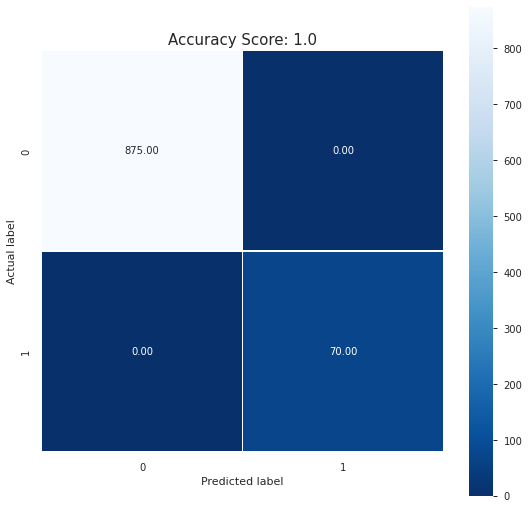

In [248]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);

In [249]:
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree

In [250]:
dot_img = tree.export_graphviz(dtc, out_file='car_dtc.dot',feature_names=X_train.columns,class_names=['1','0'],max_depth=3,filled=True,rounded=True)

In [251]:
graph_tree = pydotplus.graph_from_dot_file('car_dtc.dot')

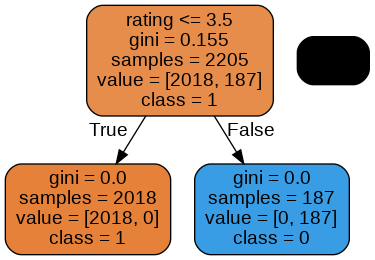

In [252]:
Image(graph_tree.create_png())

**Due to the number of features (2) feature importance will be ingored in building this model.**

We observe that our Model has an accuracy of 100%.

# **Random Forest**

In [253]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
rfc  = RandomForestClassifier(n_estimators=20,random_state=35)

In [255]:
X2 = X
y2 = y

In [256]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.30, random_state = 101)

In [257]:
rfc.fit(X2_train,y2_train)

RandomForestClassifier(n_estimators=20, random_state=35)

In [258]:
y_pred_rfc = rfc.predict(X2_test)

In [259]:
accuracy_score(y2_test,y_pred_rfc)

1.0

**EVALUATION ON DECISION TREE & RANDOM FOREST**

Accuracy of the Model for both Decison Tree and Random Forest is 1, indicating a strong performance.

The f1-score values of 1 has been used for the accuracy due to the imbalanced data set.

Confusion Matrix points to a model with good performance at Precision and Recall.

# **ML - Using NLP**

We will use NLP to make pediction on feedback based on customer reviews.

In [260]:
data.head()

,rating,date,variation,verified_reviews,feedback,Month
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,7
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,7
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,7
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,7
4,5,2018-07-31,Charcoal Fabric,Music,1,7


In [261]:
nlpdata = data.copy()

In [262]:
nlpdata.head()

,rating,date,variation,verified_reviews,feedback,Month
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,7
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,7
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,7
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,7
4,5,2018-07-31,Charcoal Fabric,Music,1,7


In [263]:
nlpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
 5   Month             3150 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.8+ KB


In [264]:
nlpdata.drop(['rating','date', 'variation','Month'], axis=1, inplace=True)

In [265]:
nlpdata.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [266]:
import string

In [267]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [268]:
from nltk.corpus import stopwords

In [269]:
#function to remove punctuation and stopwords from "nlpdata"
def message_text_pre_process(text_message):
  remove_punct = [char for char in text_message if char not in string.punctuation]
  remove_punct = ''.join(remove_punct)
  remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return remove_stopwords

In [270]:
nlpdata['verified_reviews'].apply(message_text_pre_process)

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [271]:
nlpdata.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


# Vectorization
This process assigns values to the words in our processed dataset. This process is helpful in identifying word counts and frequency.

In [272]:
from sklearn.feature_extraction.text import CountVectorizer

In [273]:
bag_of_words = CountVectorizer(analyzer=message_text_pre_process).fit(nlpdata['verified_reviews'])

In [274]:
bag_of_words_trf = bag_of_words.transform(nlpdata['verified_reviews'])

# TF-IDF (Transformer)
This process creates the bag of words containg the Text data converted into numerical feature vectors with fixed size. From this we can determine the corpus of document.

In [275]:
from sklearn.feature_extraction.text import TfidfTransformer

In [276]:
tfidf_fit = TfidfTransformer().fit(bag_of_words_trf)

In [277]:
tfidf_trf = tfidf_fit.transform(bag_of_words_trf)

# Model Building

In [278]:
from sklearn.naive_bayes import MultinomialNB

In [279]:
cust_review_model = MultinomialNB().fit(tfidf_trf,nlpdata['feedback'])

# Prediction

In [280]:
prediction_for_all_messages = cust_review_model.predict(tfidf_trf)

In [281]:
from sklearn.metrics import classification_report

In [282]:
print(classification_report(nlpdata['feedback'],prediction_for_all_messages))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       257
           1       0.92      1.00      0.96      2893

    accuracy                           0.92      3150
   macro avg       0.96      0.52      0.51      3150
weighted avg       0.93      0.92      0.89      3150



#**Summary and Conclusion**

Our target variable (feedback) is fairly balanced for the modeling. 
We will thus proceeed to use the f1-score to predict that ***the model is 92% accurate in determining feedback based on verified customer review*** of various amazon alexa products.

# **Limitations/Next Steps**


More Data could be acquired to strenghten the Accuracy and robustness of the Model.

Additonal features could enhance the training of the model in determining feedback.

The dataset has to be balanced and fed to the model for a strong prediction.

